# Aims

The aims of this notebook is to plot the Van der Waals' equation for a given gas with the Maxwell adjustment for T < T$_{c}$. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import newton
from scipy.signal import argrelextrema

In [2]:
def VdWreduced(Tr, Vr):

    Pr = 8*Tr/(3*Vr-1) - 3/Vr**2
    return Pr

In [3]:
def Maxwell_apply(Tr, Vr):
    Pr = VdWreduced(Tr, Vr)
    
    
    # This part removes any errors that might be caused later on
    if Tr >= 1:
        return Pr
    
    if min(Pr) < 0:
        raise ValueError('Negative pressure created when Tr = {}K'.format(Tr))
        
    iPrmin = argrelextrema(Pr, np.less)
    iPrmax = argrelextrema(Pr, np.greater)
    Vr0 = np.mean([Vr[iPrmin], Vr[iPrmax]])    
    
    def Vlim_find(Pr0):
        

        eos = np.poly1d((3*Pr0, -(Pr0+8*Tr), 9, -3))
        roots = eos.r
        roots.sort()
        Vrmin, _, Vrmax = roots
        
        return Vrmin, Vrmax
    
    
    def loop_difference(Vr0):
        
        #This function finds the difference in areas between the Van der Waals equation's inaccurate curves
        #This function should return zero when the correct maxwell point has been found

        Pr0 = VdWreduced(Tr, Vr0)
        Vrmin, Vrmax = Vlim_find(Pr0)
        return quad(lambda vr: VdWreduced(Tr, vr) - Pr0, Vrmin, Vrmax)[0]
    
    Vr0 = newton(loop_difference, Vr0)    #Newton-Raphson Method of approximation
    
    Pr0 = VdWreduced(Tr, Vr0)
    
    Vrmin, Vrmax = Vlim_find(Pr0)
    
    
    Pr[(Vr >= Vrmin) & (Vr <= Vrmax)] = Pr0   #Repeats Iterative Process
    return Pr

As a reminder, here is a reduced Van der Waals' equation plot, here the cubic sections of the equation are shown. These areas display a behaviour in fluids that isn't real, so maxwell's construction needs to be applied to it (which we'll show later)

In [10]:
def graph_VdWr(T_c, T_min, T_max, step):
    Vr = np.linspace(0.1, 3, 200)
    
    plt.figure(figsize=(7, 5))
    
    for T in range(T_min, T_max, step):
        Tr = T/T_c
        plt.plot(Vr, VdWreduced(Tr, Vr), label=str(round(Tr, 3)) + 'K')

    plt.title('Van der Waals Normal Plot')
    plt.xlabel('Reduced Volume')
    plt.xlim(0, 3)
    plt.xticks(np.arange(0, 3, step=0.5))
    plt.ylabel('Reduced Pressure')
    plt.ylim(0.2, 1.5)
    plt.yticks(np.arange(0.2, 1.5, step=0.2))
    plt.legend(title='Reduced Temperature')
    plt.show()    

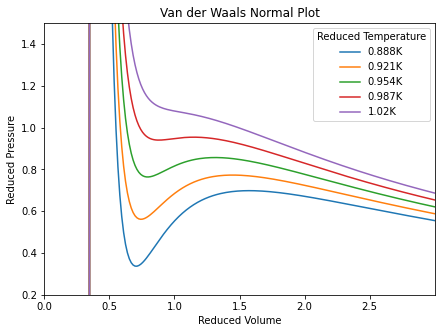

In [11]:
graph_VdWr(304, 270, 320, 10)

And here is the fixed plot for fluids, it still isn't perfect but its a far better plot than the Van der Waals plot.

In [22]:
def graph_VdWM(T_c, T_min, T_max, step, legend_on=True):
    Vr = np.linspace(0.5, 3.5, 500)
    
    plt.figure(figsize=(10, 8))
    
    for T in range(T_min, T_max, step):
        Tr = round(T/T_c, 3)
        plt.plot(Vr, Maxwell_apply(Tr, Vr), label= str(round(Tr, 3)) + ' Tc / ' + str(T) + ' K')
        
    plt.title('Van der Waals - Maxwell Plot')
    plt.xlabel('Reduced Volume')
    plt.xlim(0.25, 3.5)
    plt.xticks(np.arange(0.25, 3.5, step=0.5))
    plt.ylabel('Reduced Pressure')
    plt.ylim(0.4, 1.2)
    plt.yticks(np.arange(0.4, 1.2, step=0.2))
    if legend_on:
        plt.legend(title='Reduced Temperature')
    plt.show()    

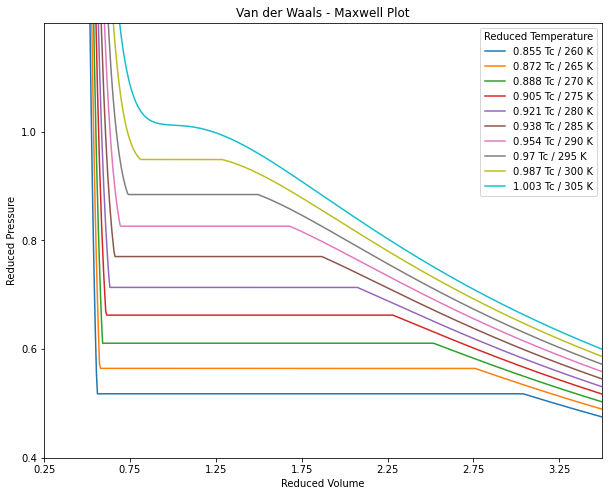

In [23]:
graph_VdWM(304, 260, 310, 5)

We can see the borders of our two-phase coexistance region start to appear when we increase the number of lines
on our graph:

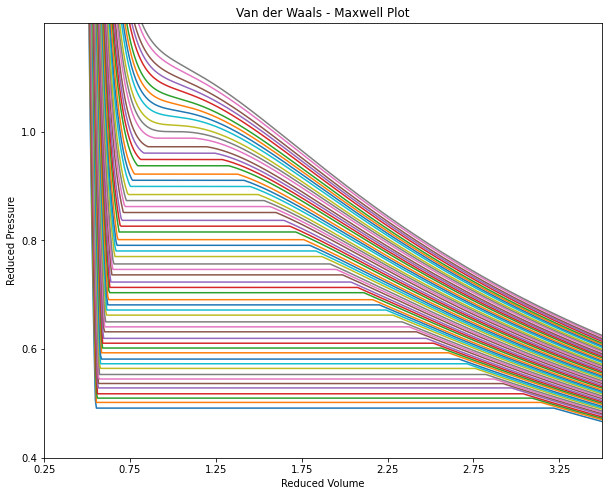

In [33]:
graph_VdWM(304, 257, 315, 1, False)